# ChatBot Logs
- Questions 1-4: https://chatgpt.com/share/66fec5cd-0aa8-8011-ac79-76e16f593bb0
- Questions 5-9: 

## Question 1
- Standard deviation is a measurement of how closely the data points in a dataset are to their mean. It is meant to describe the variability of the data.
- Standard error of the mean is a measurement of how closely the sample means in the sampling distribution are to the mean of the sample means. It is meant to describe the variability of the means when bootstrapping multiple times. The standard error of the mean can also be interpreted as the error you can expect to have when estimating the population mean using the sample means.

## Question 2
- Step 1: Calculate the sample mean (x̄)
- Step 2: Use a t-table or a z-table to find the critical value of the interval. For a 95% CI, the critical value would be 1.96. (t-score is used when you have a small sample size and unknown population parameters. z-score is used when you have a large sample size or if you know the population's parameters)
- Step 3: Calculate the standard error
- Step 4: Calculate the confidence interval: CI = x̄ +/- 1.96*SE

## Question 3
- Step 1: Take many bootstrapped samples and create a sampling distribution of the means
- Step 2: Determine the quantile we want for our interval. For a 95% CI, we want between the 2.5th percentile (meaning 2.5% of the data lies below this) and the 97.5th percentile (97.5% of the data lies below this). This is because, the 97.5% of the data that is below the 97.5th percentile minus the 2.5% that is not included between the two bounds, will equal 95%.
- Step 3: Using the np.quantile() function, calculate the confidence interval.
  - lower_bound = np.quantile(bootstrapped_means, 0.025)
  - upper_bound = np.quantile(bootstrapped_means, 0.975)
  - This means the confidence interval would be between this lower_bound and upper_bound

## Question 4


In [2]:
# 95% Confidence Interval for Population Mean

import numpy as np

# Example sample data
sample_data = np.array([12, 15, 14, 10, 18, 20, 13, 16, 19, 11])

# Number of bootstrap samples
n_bootstraps = 1000

# List to store bootstrapped means
bootstrapped_means = []

# Generate bootstrap samples and calculate means
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Calculate the 2.5th and 97.5th percentiles for the 95% CI
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

# 95% bootstrap confidence interval for the mean
ci_95_mean = (lower_bound, upper_bound)

print(f"95% Bootstrap Confidence Interval for the Mean: {ci_95_mean}")

95% Bootstrap Confidence Interval for the Mean: (12.8, 16.7)


In [4]:
# 95% Confidence Interval for Population Median

import numpy as np

# Example sample data
sample_data = np.array([12, 15, 14, 10, 18, 20, 13, 16, 19, 11])

# Number of bootstrap samples
n_bootstraps = 1000

# List to store bootstrapped medians
bootstrapped_medians = []

# Generate bootstrap samples and calculate medians
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrapped_medians.append(np.median(bootstrap_sample))

# Calculate the 2.5th and 97.5th percentiles for the 95% CI
lower_bound = np.quantile(bootstrapped_medians, 0.025)
upper_bound = np.quantile(bootstrapped_medians, 0.975)

# 95% bootstrap confidence interval for the median
ci_95_median = (lower_bound, upper_bound)

print(f"95% Bootstrap Confidence Interval for the Median: {ci_95_median}")


# This code works for a variety of parameters will small adjustments.
# Mean: np.mean()
# Median: np.median()
# Variance: np.var()
# Standard Deviation: np.std()

95% Bootstrap Confidence Interval for the Median: (12.0, 18.01249999999999)


## Question 5

- The difference between a population parameter and a sample statistic is that the population parameters are fixed values that we usually do not know. These are the things that we are trying to predict using the sample statistics. They include the statistics of all members of the population. Sample statistics on the other hand are measurable values that are observed within the sample only. These can help give us an idea of what the population might look like but they will likely not produce the exact same value.
- The general formula for confidence interval is: CI = x̄ +/- (z)(σ/sqrt(n))
  - x̄, z, and n are sample statistics
  - σ is a population parameter
- Since we often do not know the population parameters, we cannot use σ. In this case, we can instead use the sample standard deviation as an estimation of the population standard deviation. This is the formula: CI = x̄ +/- (z)(s/sqrt(n))
  - x̄, z, s, and n are all sample statistics

## Question 6
1. What is the process of bootstrapping?

  - Bootstrapping is when you take a sample of some population and manipulate it to provide a very accurate distribution without needing a super large sample size. We do this by randomly sampling from our initial sample with replacement. Each of these sub-samples must be the same size as the initial sample but because we are sampling with replacement this time, the sub-sample will usually not be the same as the initial sample. We then take this subsample, record a statistic about it and then resample. After collecting sufficient sample statistics, we can create a sampling distribution out of them. This sampling distribution turns out to be highly accurate with the population. Essentially, bootstrapping is attempting to simulate the population using the few data points that you have by repeatedly shuffling them around.

2. What is the main purpose of bootstrapping?

  - The main purpose of bootstrapping is to save time and money for statisticians. It is often very costly to get a very large sample size and very time consuming as well but if we had just 1 medium sized sample that we can just resample from using a computer, it is a lot more efficient. It will also help you see the range of possible outcomes so you can understand how confidently your distribution can simulate the population.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might.
  - Take samples from your sample with replacement and record the average of each of these samples.
  - Create a sampling distribution using those average values.
  - Calculate the standard error of the means.
  - See if your hypothesis aligns with the collected sample means.

## Question 7
Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"?

To reject the null hypothesis (that the mean is zero), we must show that with our data, it is unlikely for that null hypothesis to be true. If the hypothesized mean lies within our 95% confidence interval, then we cannot reject it because we are saying that we are 95% certain that the population mean lies in that interval. If the population mean really was zero, then it would satisfy the 95% certainty of our claim. Alternatively, if zero was not in the interval, we can say that we are 95% certain that the population mean lies in some interval and since zero is not in that interval, it is unlikely for the population mean to be zero. We can reject the null hypothesis because it is unlikely for that hypothesis to be true.

## Question 8
In this scenario, the null hypothesis is that the vaccine has no effect on the patients' health. To claim that the vaccine is helping the patients, we must reject this null hypothesis to imply the alternative hypothesis that the vaccine does in fact work. To do this, we can use bootstrapping to find how much the patients' health score changes when they take this vaccine. We can use this to predict how the average patient will react to it (will it improve their health or not?). Based on our confidence interval from bootstrapping, we can reject (or fail to reject) the null hypothesis and make a conclusion accordingly.

95% Bootstrap Confidence Interval for the Mean Health Score Difference: (1.0, 5.6)
The vaccine appears to have a significant positive effect on health.


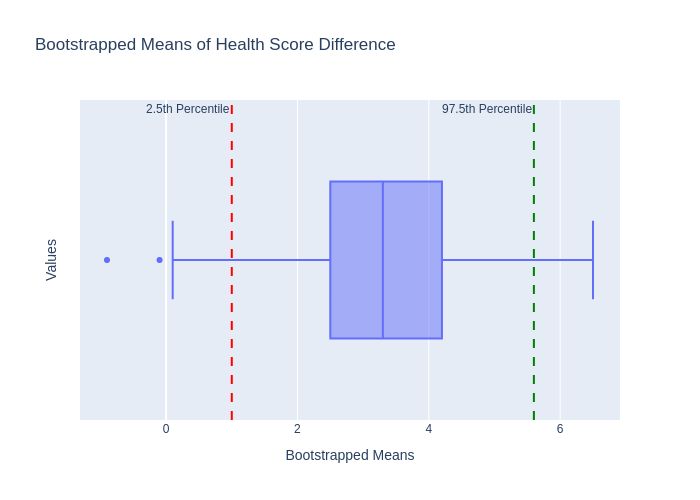

In [16]:
# Question 8

import numpy as np
import pandas as pd
import plotly.express as px

# Create the dataframe with the given data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the health score differences
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping parameters
n_bootstraps = 1000
bootstrapped_means = []

# Perform bootstrapping
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Calculate the 2.5th and 97.5th percentiles for the 95% CI
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Output results
print(f"95% Bootstrap Confidence Interval for the Mean Health Score Difference: ({lower_bound}, {upper_bound})")

# Determine if the CI suggests a significant effect
if lower_bound > 0:
    print("The vaccine appears to have a significant positive effect on health.")
else:
    print("The vaccine's effect on health is not significant.")

fig = px.box(x=bootstrapped_means, title='Bootstrapped Means of Health Score Difference')
fig.add_vline(x=lower_bound, line_dash="dash", line_color="red", annotation_text="2.5th Percentile", annotation_position="top left")
fig.add_vline(x=upper_bound, line_dash="dash", line_color="green", annotation_text="97.5th Percentile", annotation_position="top left")
fig.update_layout(xaxis_title='Bootstrapped Means', yaxis_title='Values')
fig.show(renderer="png")

## Question 8 continued
Quantitative Analysis:
- Code explanation:
  - First, we create a dictionary to store our data in json format
  - Next, we use the pandas library to create a DataFrame object using the json data
  - Then, we add a column 'HealthScoreDifference' to track the effect the vaccine had on each person
  - After, we use bootstrapping to resample the DataFrame 1000 times with replacement, recording the mean HealthScoreDifference of each in the bootstrapped_means list
  - Next, we calculate the lower and upper bounds of a 95% confidence interval
    - A confidence interval of (1.0, 5.6) means that we are 95% certain that the population mean of HealthScoreDifference is somewhere between 1.0 and 5.6
- Supporting Visualizations
  - The boxplot at the bottom shows the distribution of the bootstrapped means of the HealthScoreDifferences
  - There are two clear outliers that show a decrease in health score but the quartiles are all well above 0.
  - The dashed red line indicates the 2.5th percentile
  - The dashed green line indicates the 97.5th percentile
  - The area between the red and green lines is our confidence interval

Findings and Discussion
- Conclusion
  - Since the confidence interval does not include anything less than or equal to 0, we can reject the null hypothesis
  - Rejecting the null hypothesis implies the alternative, meaning the vaccine has a significant positive effect on health
- Further Considerations
  - The gender of the patient could have some impact on its effectiveness
  - The age of the patient could have some impact on its effectiveness

## Question 9
Yes